In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Amazon Sales data.csv')

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Handle any potential issues with the data
df.dropna(inplace=True)

In [ ]:
# Extract month and year from Order Date
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Month-wise sales trend
monthly_sales = df.groupby('Order Month')['Total Revenue'].sum()

# Year-wise sales trend
yearly_sales = df.groupby('Order Year')['Total Revenue'].sum()

# Yearly Month-wise sales trend
yearly_monthly_sales = df.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


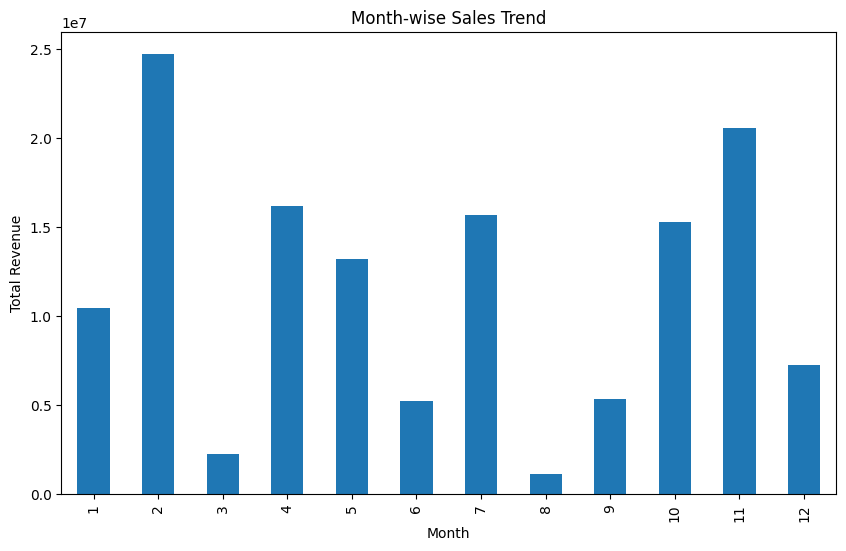

In [ ]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


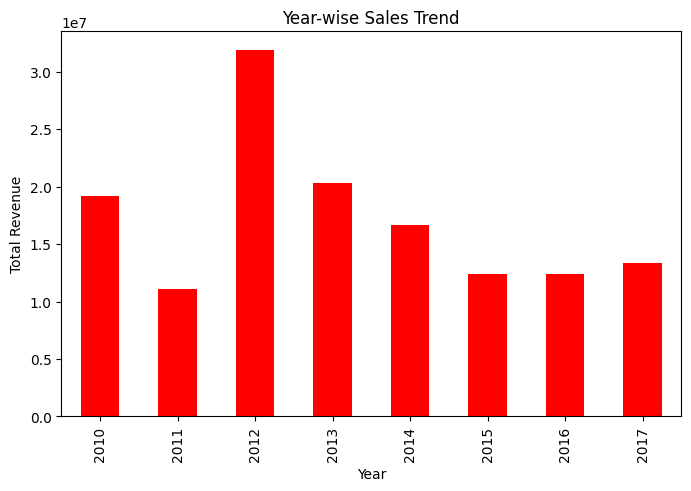

In [ ]:
plt.figure(figsize=(8, 5))
yearly_sales.plot(kind='bar', color='red')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


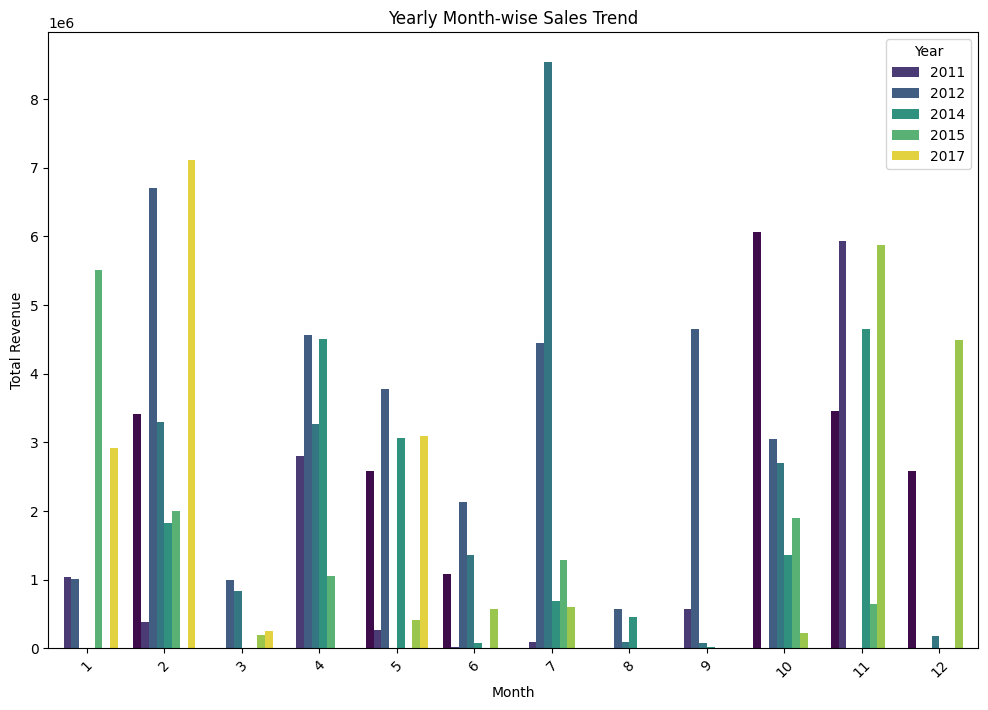

In [ ]:
# Grouped bar chart for Yearly Month-wise Sales Trend
yearly_monthly_sales = df.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().reset_index()

# Grouped bar chart for Yearly Month-wise Sales Trend
plt.figure(figsize=(12, 8))
sns.barplot(x='Order Month', y='Total Revenue', hue='Order Year', data=yearly_monthly_sales, palette='viridis')

plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


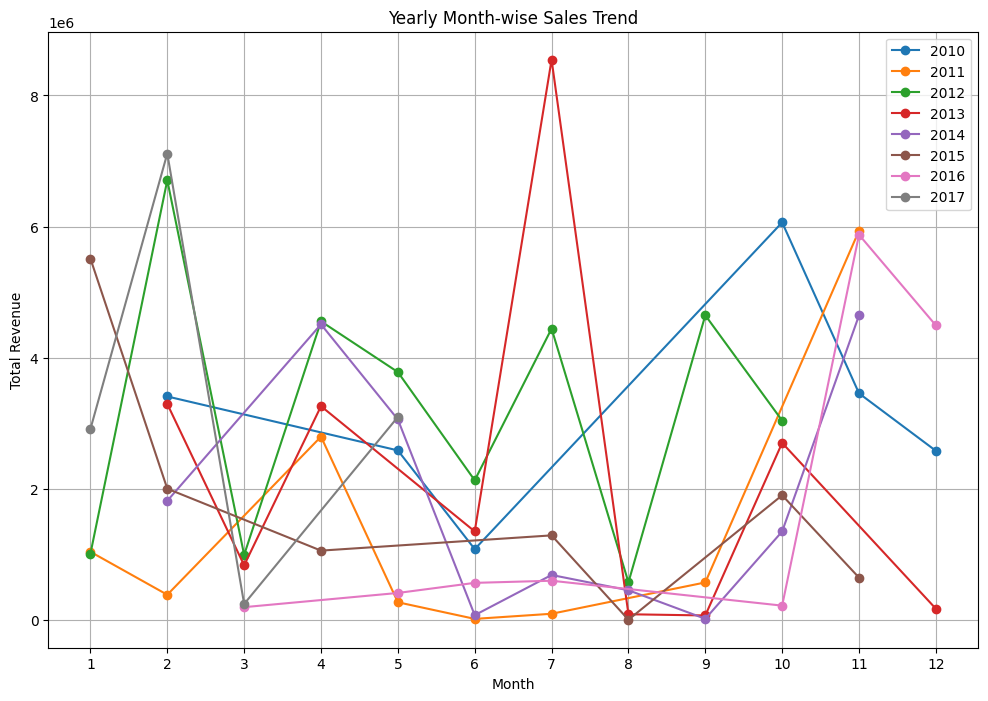

In [ ]:
# Line plot for Yearly Month-wise Sales Trend
plt.figure(figsize=(12, 8))
for year in yearly_monthly_sales['Order Year'].unique():
    year_data = yearly_monthly_sales[yearly_monthly_sales['Order Year'] == year]
    plt.plot(year_data['Order Month'], year_data['Total Revenue'], marker='o', label=year)

plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


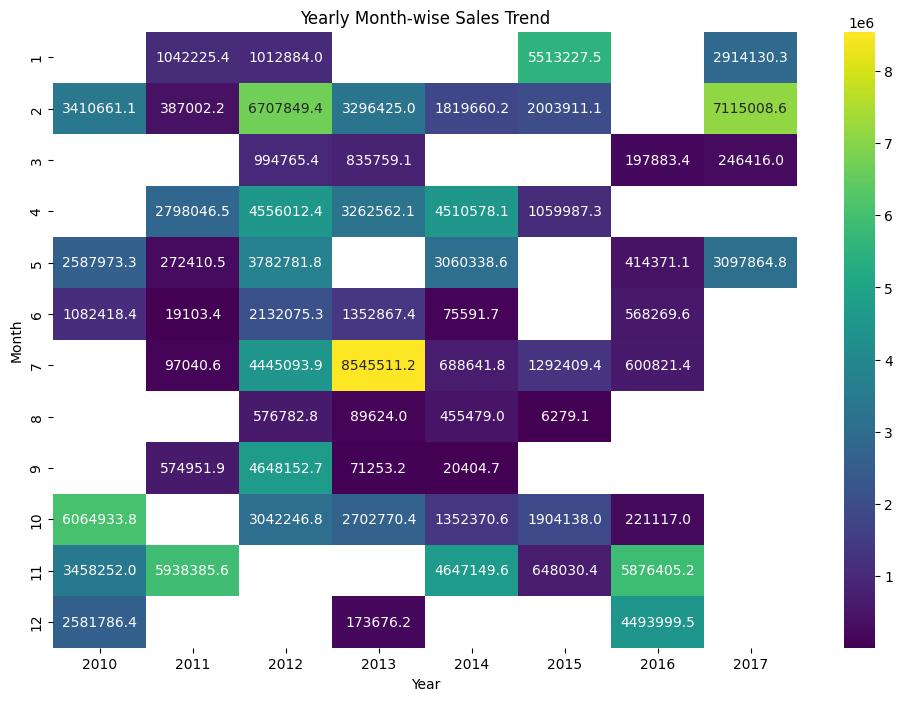

In [ ]:
# Ensure the DataFrame is set up correctly
yearly_monthly_sales = df.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().reset_index()

# Pivot the DataFrame to get a matrix form suitable for a heatmap
pivot_table = yearly_monthly_sales.pivot(index='Order Month', columns='Order Year', values='Total Revenue')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='viridis')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


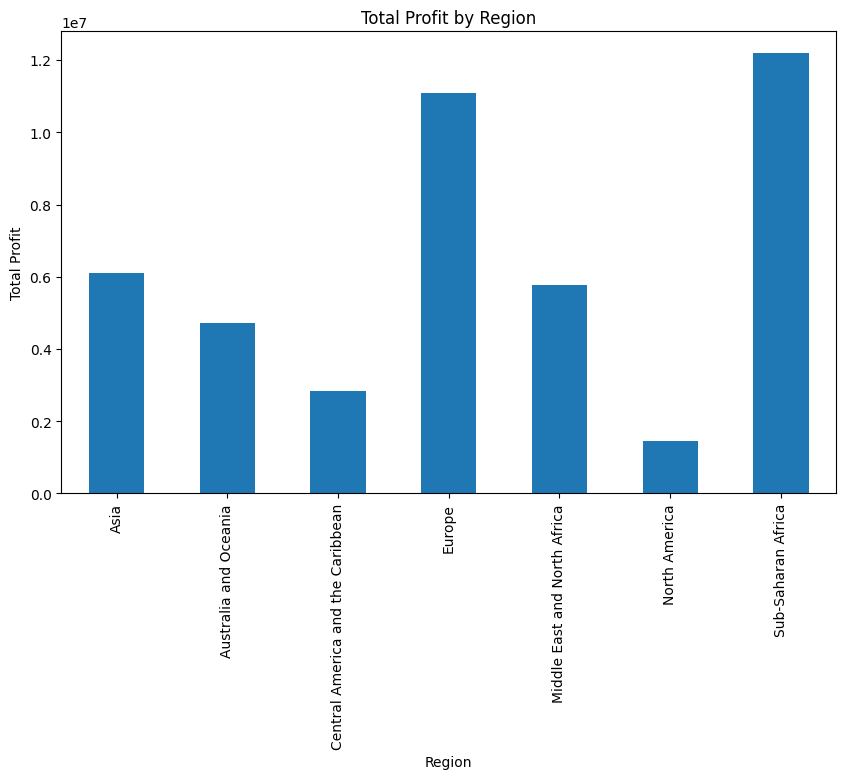

In [ ]:
profit_by_region = df.groupby('Region')['Total Profit'].sum()

# Profit margins by item type
profit_margins_by_item = df.groupby('Item Type')['Total Profit'].sum() / df.groupby('Item Type')['Total Revenue'].sum()

# Plotting
plt.figure(figsize=(10, 6))
profit_by_region.plot(kind='bar')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


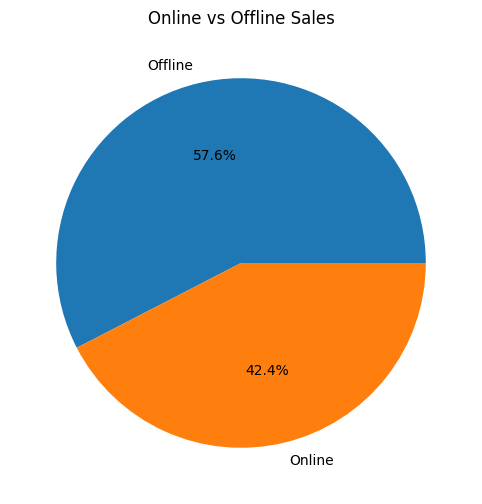

In [ ]:
# Online vs Offline Sales
sales_channel_performance = df.groupby('Sales Channel')['Total Revenue'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sales_channel_performance.plot(kind='pie', autopct='%1.1f%%')
plt.title('Online vs Offline Sales')
plt.ylabel('')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Frequent Itemsets with Profits:
             itemsets  support       profit
4         (Cosmetics)     0.13  14556048.66
6         (Household)     0.09   7412605.71
8   (Office Supplies)     0.12   5929583.75
3           (Clothes)     0.13   5233334.40
0         (Baby Food)     0.07   3886643.70
2            (Cereal)     0.07   2292443.43
11       (Vegetables)     0.06   1265819.63
9     (Personal Care)     0.10   1220622.48
1         (Beverages)     0.08    888047.28
10           (Snacks)     0.03    751944.18
7              (Meat)     0.02    610610.00
5            (Fruits)     0.10    120495.18


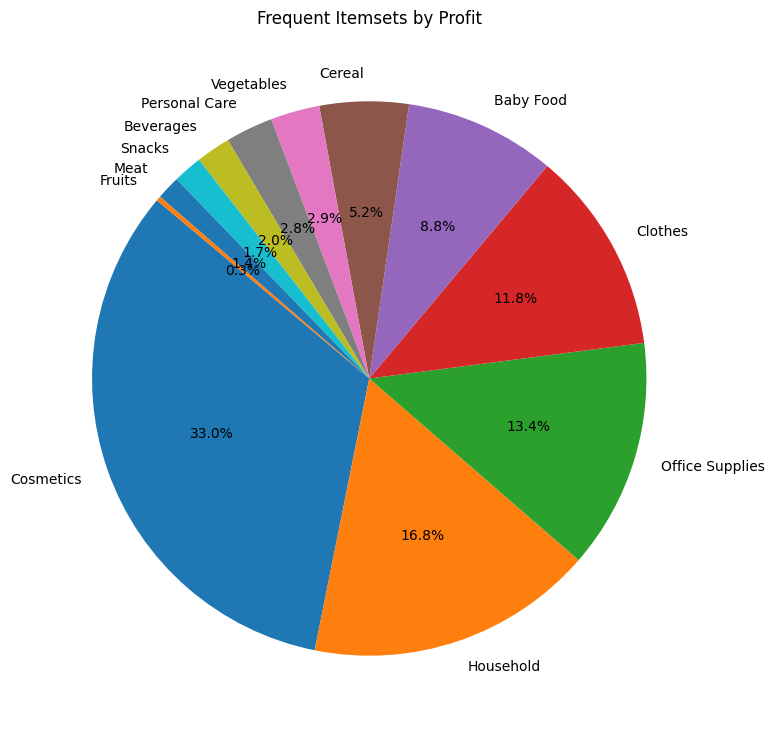

In [ ]:
# Prepare a transactional dataset
transaction_data = df[['Order ID', 'Item Type']].copy()
transaction_data['Item'] = transaction_data['Item Type']

# Group by 'Order ID' and 'Item', then count occurrences
transaction_data = transaction_data.groupby(['Order ID', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Order ID')

# Convert to binary matrix
def encode_units(x):
    return 1 if x >= 1 else 0

transaction_data = transaction_data.applymap(encode_units)

# Ensure boolean DataFrame for mlxtend
transaction_data = transaction_data.astype(bool)

# Generate frequent itemsets using Apriori
frequent_itemsets = apriori(transaction_data, min_support=0.01, use_colnames=True)

# Calculate total profit for each item
item_profits = df.groupby('Item Type')['Total Profit'].sum().reset_index()
item_profits.columns = ['item', 'total_profit']

# Calculate profit for each frequent itemset
def calculate_itemset_profit(itemset, item_profits):
    items = itemset.split(',')
    total_profit = item_profits[item_profits['item'].isin(items)]['total_profit'].sum()
    return total_profit

frequent_itemsets['items'] = frequent_itemsets['itemsets'].apply(lambda x: ','.join(list(x)))
frequent_itemsets['profit'] = frequent_itemsets['items'].apply(lambda x: calculate_itemset_profit(x, item_profits))

# Rank the frequent itemsets by their profit
frequent_itemsets = frequent_itemsets.sort_values(by='profit', ascending=False)

# Print frequent itemsets with their profits
print("\nFrequent Itemsets with Profits:")
print(frequent_itemsets[['itemsets', 'support', 'profit']])

# Plot a pie chart of the frequent itemsets based on their profits
plt.figure(figsize=(12, 9))
plt.pie(frequent_itemsets['profit'], labels=frequent_itemsets['items'], autopct='%1.1f%%', startangle=140)
plt.title('Frequent Itemsets by Profit')
plt.show()